In [8]:
import numpy as np
import os
import sys
import re
import glob
import h5py 
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D,axes3d


In [5]:
# check what is in the dataset
dataset_base = "/data/shared/LCDLargeWindow/"
el_var_path = os.path.join(dataset_base,'varangle/GammaEscan/GammaEscan_RandomAngle_1_1.h5')
el_fixed_path = os.path.join(dataset_base,'fixedangle/GammaEscan/GammaEscan_1_1.h5')
el_fixed = h5py.File(el_fixed_path,'r')
el_var = h5py.File(el_var_path,'r')
listofvars = []
for key in el_var.keys():
    print(el_var[key])
    listofvars.append(el_var[key].name.replace('/',''))
print(listofvars)

<HDF5 dataset "ECAL": shape (10000, 51, 51, 25), type "<f8">
<HDF5 dataset "ECAL_E": shape (10000,), type "<f8">
<HDF5 dataset "ECAL_nHits": shape (10000,), type "<i8">
<HDF5 dataset "ECAL_ratioFirstLayerToSecondLayerE": shape (10000,), type "<f8">
<HDF5 dataset "ECAL_ratioFirstLayerToTotalE": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentX1": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentX2": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentX3": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentX4": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentX5": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentX6": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentY1": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentY2": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentY3": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentY4": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentY5": shape (10000,), type "<f8">
<HDF5 dataset "ECALmomentY6": shape (10

In [6]:
#quickly visulize data
#randomly pick a event
#visulize the event
def getEnergy(elf):
    hcalenergy =np.array(elf['HCAL_E'])
    ecalenergy =np.array(elf['ECAL_E'])
    trueenergy =np.array(elf['energy'])
    return ecalenergy,hcalenergy,trueenergy
el_fixed_ecale,el_fixed_hcale,true_fixed = getEnergy(el_fixed)
el_var_ecale,el_var_hcale,true_var = getEnergy(el_var)

In [272]:
hcalarray = np.array(el_var['ECAL'])
sample= random.sample(list(hcalarray),1)[0]
print(sample.size,sample.shape)
xy = np.mgrid[0:51:1,0:51:1,0:25:1].reshape(3,-1).T
viz = [[x,y,z,sample[x][y][z]] for  (x,y,z) in list(xy) if sample[x][y][z]>0]
#viz = [ for item in vizall]
#print(filter(lambda x: x[3]>0, vizall))
vizx = [item[0] for item in viz]
vizy = [item[1] for item in viz]
vizz = [item[2] for item in viz]
vize = [item[3]*100 for item in viz]

65025 (51, 51, 25)


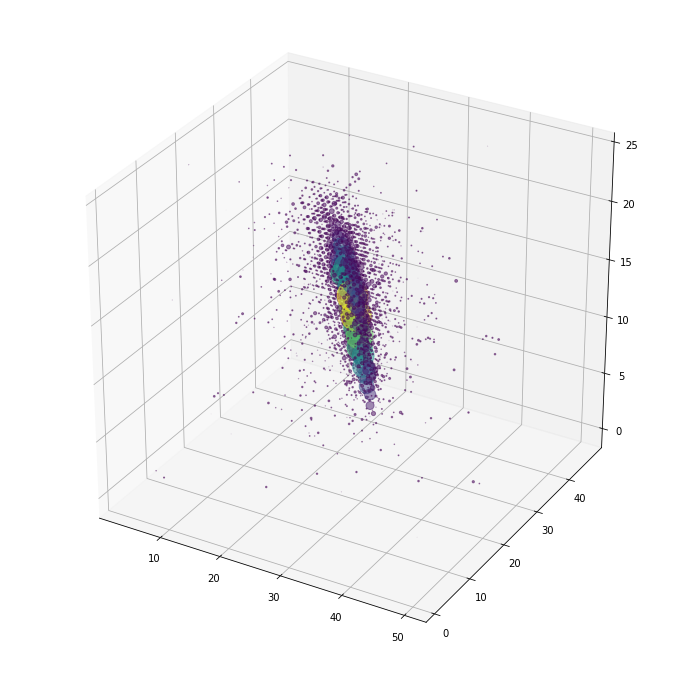

In [375]:

%matplotlib inline
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vizx,vizy,vizz,c=vize,s= vize ,marker='o',alpha=0.5)
fig.savefig("3d_var.pdf")

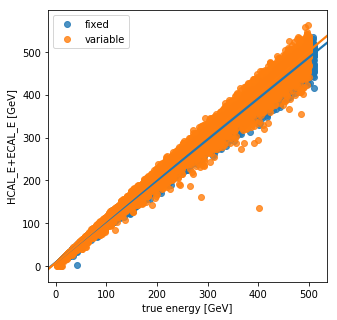

In [334]:
fig = plt.figure(figsize=(5,5))
df_fixed=pd.DataFrame({'true energy [GeV]': true_fixed, 'HCAL_E+ECAL_E [GeV]': el_fixed_ecale+el_fixed_hcale})
df_var=pd.DataFrame({'true energy [GeV]': true_var, 'HCAL_E+ECAL_E [GeV]': el_var_ecale+el_var_hcale})
#ax.scatter(recoenergy,trueenergy,c=vize,s= vize ,marker='o',alpha=0.5)
#plt.plot( 'x', 'y', data=df, linestyle='none', marker='o')
sns.regplot(x=df_fixed["true energy [GeV]"], y=df_fixed["HCAL_E+ECAL_E [GeV]"],label='fixed')
sns.regplot(x=df_var["true energy [GeV]"], y=df_var["HCAL_E+ECAL_E [GeV]"],label='variable')
plt.legend(loc='best')

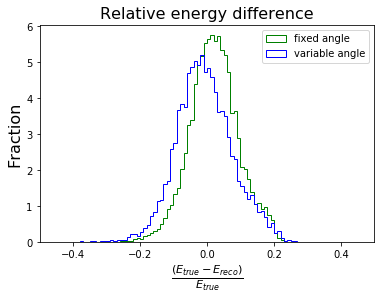

In [9]:
def RelDif(target,pred):
    difference = target-pred   
    # the histogram of the data  
    mean = np.mean(difference)
    std = np.std(difference)  # standard deviation    
    error=std/np.sqrt(len(target))
    return difference,mean,std,error
        
nbins = np.arange(-.5,.5,0.01)    
fixed_diff,fixed_mean,fixed_std,fixed_error = RelDif(true_fixed,el_fixed_ecale+el_fixed_hcale)
var_diff,var_mean,var_std,var_error = RelDif(true_var,el_var_ecale+el_var_hcale)

plt.hist(fixed_diff/true_fixed, nbins, normed=1, color='green', histtype='step',linestyle='solid',label="fixed angle")
plt.hist(var_diff/true_var, nbins, normed=1, color='blue', histtype='step',linestyle='solid',label="variable angle")
plt.xlim(-.5,.5)
plt.xlabel('Relative difference between true and predicted energy (%)',size=16)
plt.xlabel(r'$\frac{(E_{true} - E_{reco})}{E_{true}}$',size=16)
plt.ylabel('Fraction',size=16)
plt.title("Relative energy difference",size=16)
plt.legend(loc='best')
plt.show()

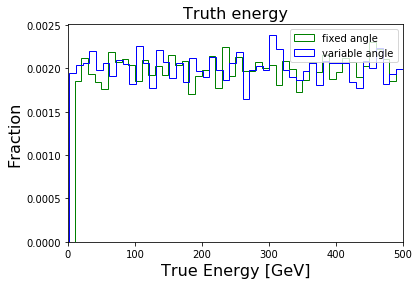

In [342]:
plt.hist(true_fixed, nbins, normed=1, color='green', histtype='step',linestyle='solid',label="fixed angle")
plt.hist(true_var, nbins, normed=1, color='blue', histtype='step',linestyle='solid',label="variable angle")
plt.xlim(0,500)
plt.xlabel('True energy ',size=16)
plt.xlabel('True Energy [GeV]',size=16)
plt.ylabel('Fraction',size=16)
plt.title("Truth energy",size=16)
plt.legend(loc='best')
plt.show()

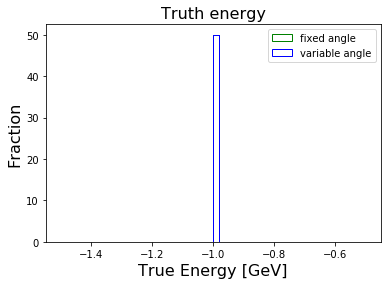

[-1 -1 -1 ..., -1 -1 -1]


In [348]:
plt.hist(np.array(el_fixed['openingAngle']), nbins, normed=1, color='green', histtype='step',linestyle='solid',label="fixed angle")
plt.hist(np.array(el_var['openingAngle']), nbins, normed=1, color='blue', histtype='step',linestyle='solid',label="variable angle")
#plt.xlim(0,5)
plt.xlabel('True energy ',size=16)
plt.xlabel('True Energy [GeV]',size=16)
plt.ylabel('Fraction',size=16)
plt.title("Truth energy",size=16)
plt.legend(loc='best')
plt.show()

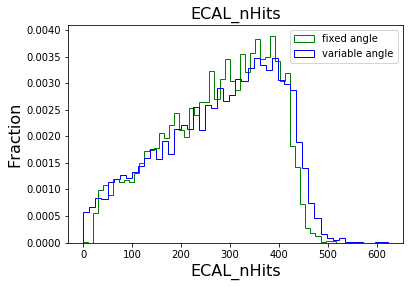

In [360]:
var = 'ECAL_nHits'
plt.hist(np.array(el_fixed[var]), nbins, normed=1, color='green', histtype='step',linestyle='solid',label="fixed angle")
plt.hist(np.array(el_var[var]), nbins, normed=1, color='blue', histtype='step',linestyle='solid',label="variable angle")
#plt.xlim(0,5)
plt.xlabel(var,size=16)
plt.xlabel(var,size=16)
plt.ylabel('Fraction',size=16)
plt.title(var,size=16)
plt.legend(loc='best')
plt.show()

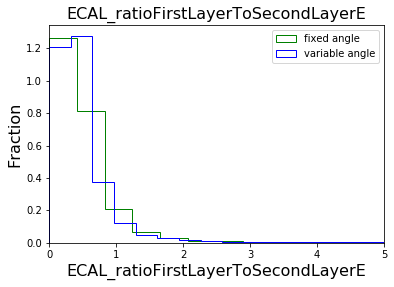

In [359]:
var='ECAL_ratioFirstLayerToSecondLayerE'
plt.hist(np.array(el_fixed[var]), nbins, normed=1, color='green', histtype='step',linestyle='solid',label="fixed angle")
plt.hist(np.array(el_var[var]), nbins, normed=1, color='blue', histtype='step',linestyle='solid',label="variable angle")
plt.xlim(0,5)
plt.xlabel(var,size=16)
plt.xlabel(var,size=16)
plt.ylabel('Fraction',size=16)
plt.title(var,size=16)
plt.legend(loc='best')
plt.show()

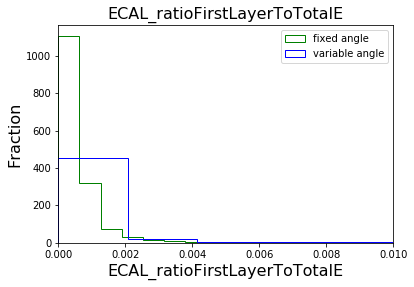

In [358]:
var='ECAL_ratioFirstLayerToTotalE'
plt.hist(np.array(el_fixed[var]), nbins, normed=1, color='green', histtype='step',linestyle='solid',label="fixed angle")
plt.hist(np.array(el_var[var]), nbins, normed=1, color='blue', histtype='step',linestyle='solid',label="variable angle")
plt.xlim(0,0.01)
plt.xlabel(var,size=16)
plt.xlabel(var,size=16)
plt.ylabel('Fraction',size=16)
plt.title(var,size=16)
plt.legend(loc='best')
plt.show()